# Perceptron from Scratch

## Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Define Perceptron Class

In [ ]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Train
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                y_pred = self.predict(x_i)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

## Step 3: Create AND Gate Dataset

In [ ]:
# AND gate: inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])  # AND truth table

## Step 4: Train Perceptron

In [ ]:
perceptron = Perceptron(lr=0.1, epochs=10)
perceptron.fit(X, y)

# Test predictions
print("Predictions:", perceptron.predict(X))

Predictions: [0 0 0 1]


## Step 5: Visualize Decision Boundary

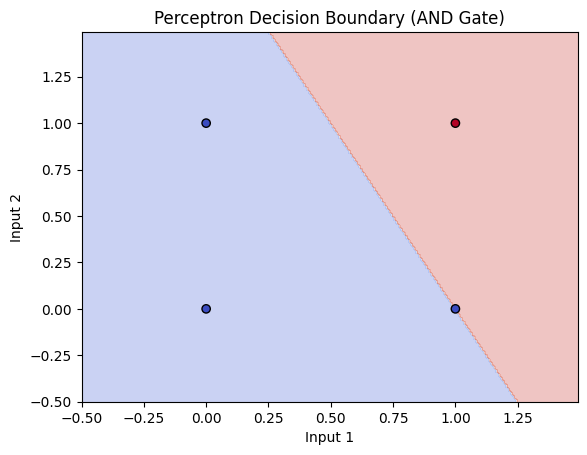

In [ ]:
def plot_decision_boundary(X, y, model):
    # Create grid
    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.01),
                         np.arange(x1_min, x1_max, 0.01))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Perceptron Decision Boundary (AND Gate)')
    plt.show()

plot_decision_boundary(X, y, perceptron)

## Done!  
Copy each block into Jupyter Lab.  
It trains a perceptron on the AND gate and plots the decision boundary.  
Minimal, working, and visual.